In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [3]:
hists={}
for filename in os.listdir('hists'):
    print(filename)
    with gzip.open('hists/'+filename) as fin:
        hin = pickle.load(fin)
        for k in hin.keys():
            if k in hists: hists[k]+=hin[k]
            else: hists[k]=hin[k]
        
print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("dataset"))

ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-600To800_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-1200To2500_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-400To600_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-800To1200_13TeV-madgraph.pkl.gz
ZJetsToNuNu_HT-200To400_13TeV-madgraph.pkl.gz
{('ZJetsToNuNu_HT-100To200_13TeV-madgraph',): (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])), ('ZJetsToNuNu_HT-600To800_13TeV-madgraph',): (array([29160.11017229, 14601.80137215, 14558.59991508,  7092.54972368,
       11548.00565392,    64.97685456, 17443.14140732,  8708.64520034,
        5821.89123455,  8770.24512159, 11683.60699287, 14416.36115551,
        2864.97856829,  2890.77135195,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ]), 

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset",)
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Z+jets"] = ("ZJets*",)
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

print(hists['recoil'].values(sumw2=True))
print(hists['recoil'].identifiers("process"))
print(hists['recoil'])

{('Z+jets',): (array([7.70186641e+05, 1.90158216e+05, 1.50758656e+05, 2.62590702e+05,
       2.96241465e+05, 3.30199975e+04, 1.31217899e+05, 5.77914718e+04,
       1.26464814e+04, 2.56899749e+04, 1.70231815e+04, 1.44163612e+04,
       2.87285653e+03, 2.89230942e+03, 0.00000000e+00, 4.05555109e+03,
       3.22546777e+00, 0.00000000e+00, 0.00000000e+00, 3.70533076e+02,
       0.00000000e+00]), array([1.31713472e+06, 8.38321184e+04, 2.67855790e+05, 8.43725791e+04,
       3.04412116e+05, 1.04919920e+04, 3.68390042e+04, 1.56199513e+04,
       5.61764578e+02, 5.50129850e+03, 8.24485756e+02, 8.39363622e+02,
       1.66808864e+02, 1.68320829e+02, 0.00000000e+00, 1.09123011e+02,
       2.40825054e-02, 0.00000000e+00, 0.00000000e+00, 2.76653355e+00,
       0.00000000e+00]))}
['Z+jets']
<Hist (process,recoil) instance at 0x11e42e5f8>


<Hist (process,recoil) instance at 0x11e42e5f8> {('Z+jets',): (array([7.70186641e+05, 1.90158216e+05, 1.50758656e+05, 2.62590702e+05,
       2.96241465e+05, 3.30199975e+04, 1.31217899e+05, 5.77914718e+04,
       1.26464814e+04, 2.56899749e+04, 1.70231815e+04, 1.44163612e+04,
       2.87285653e+03, 2.89230942e+03, 0.00000000e+00, 4.05555109e+03,
       3.22546777e+00, 0.00000000e+00, 0.00000000e+00, 3.70533076e+02,
       0.00000000e+00]), array([1.31713472e+06, 8.38321184e+04, 2.67855790e+05, 8.43725791e+04,
       3.04412116e+05, 1.04919920e+04, 3.68390042e+04, 1.56199513e+04,
       5.61764578e+02, 5.50129850e+03, 8.24485756e+02, 8.39363622e+02,
       1.66808864e+02, 1.68320829e+02, 0.00000000e+00, 1.09123011e+02,
       2.40825054e-02, 0.00000000e+00, 0.00000000e+00, 2.76653355e+00,
       0.00000000e+00]))}
True
{}


KeyError: ()

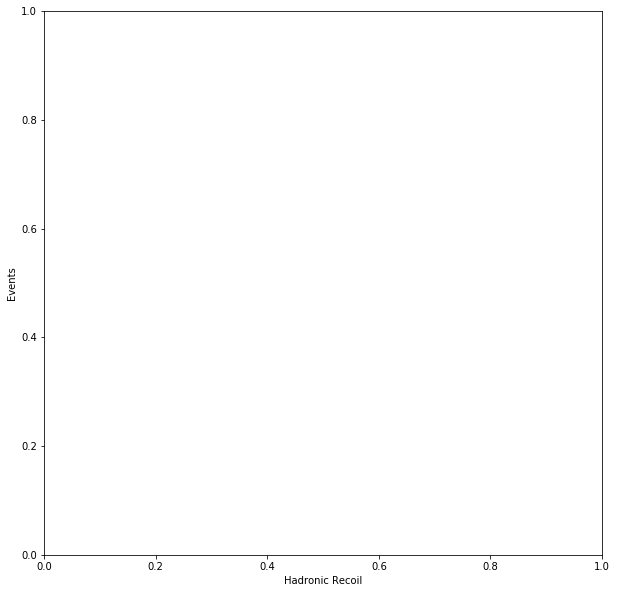

In [10]:
from cycler import cycler

fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_prop_cycle(cycler(color=colors))
#overlay="process",


print(hists['recoil'],hists['recoil'].values(sumw2=True))

print(hists['recoil'].identifiers("process")[0] == "Z+jets")
to_plot = hists['recoil'].project("process","Z+jets")
print(to_plot.values(sumw2=True))

plot.plot1d(to_plot, ax=ax)#, clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)
#leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
nbins = sum(sum(arr.size for arr in h._sumw.values()) for h in hists.values())
nfilled = sum(sum(np.sum(arr>0) for arr in h._sumw.values()) for h in hists.values())
print("Now %.1fM bins" % (nbins/1e6, ))
print("Nonzero bins: %.1f%%" % (100*nfilled/nbins, ))

In [22]:
pickle.dumps(hists['recoil'])

b'\x80\x03cfnal_column_analysis_tools.hist.hist_tools\nHist\nq\x00)\x81q\x01}q\x02(X\x06\x00\x00\x00_labelq\x03X\x06\x00\x00\x00Eventsq\x04X\x06\x00\x00\x00_dtypeq\x05X\x01\x00\x00\x00dq\x06X\x05\x00\x00\x00_axesq\x07cfnal_column_analysis_tools.hist.hist_tools\nCat\nq\x08)\x81q\t}q\n(X\x05\x00\x00\x00_nameq\x0bX\x07\x00\x00\x00processq\x0ch\x03X\x07\x00\x00\x00Processq\rX\x0b\x00\x00\x00_categoriesq\x0e]q\x0fX\x06\x00\x00\x00Z+jetsq\x10aX\x08\x00\x00\x00_sortingq\x11X\t\x00\x00\x00placementq\x12ubcfnal_column_analysis_tools.hist.hist_tools\nBin\nq\x13)\x81q\x14}q\x15(h\x0bX\x06\x00\x00\x00recoilq\x16h\x03X\x0f\x00\x00\x00Hadronic Recoilq\x17X\x08\x00\x00\x00_uniformq\x18\x89X\x05\x00\x00\x00_binsq\x19cnumpy.core._multiarray_umath\n_reconstruct\nq\x1acnumpy\nndarray\nq\x1bK\x00\x85q\x1cC\x01bq\x1d\x87q\x1eRq\x1f(K\x01K\x17\x85q cnumpy\ndtype\nq!X\x02\x00\x00\x00f8q"K\x00K\x01\x87q#Rq$(K\x03X\x01\x00\x00\x00<q%NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq&b\x89C\xb8\x00\x00\x00\x00\x00@o@